# Phase 1: Data Preparation

## General info

In [164]:
import pandas as pd

In [165]:
df=pd.read_csv('Final_Augmented_dataset_Diseases_and_Symptoms.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [97]:
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Check Missings

In [167]:
df.isna().sum()

diseases                            0
anxiety and nervousness             0
depression                          0
shortness of breath                 0
depressive or psychotic symptoms    0
                                   ..
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
ankle weakness                      0
neck weakness                       0
Length: 378, dtype: int64

## Check Duplicates

In [168]:
df.duplicated().sum()

57298

In [169]:
df=df.drop_duplicates()

In [170]:
df.duplicated().sum()

0

## Feature Engineering<h2>

### Remove diseases whose recurrence rate is less than 800</h3>

In [171]:
df['diseases'].unique().tolist()

['panic disorder',
 'vocal cord polyp',
 'turner syndrome',
 'cryptorchidism',
 'poisoning due to ethylene glycol',
 'atrophic vaginitis',
 'fracture of the hand',
 'cellulitis or abscess of mouth',
 'eye alignment disorder',
 'headache after lumbar puncture',
 'pyloric stenosis',
 'salivary gland disorder',
 'osteochondrosis',
 'injury to the knee',
 'metabolic disorder',
 'vaginitis',
 'sick sinus syndrome',
 'tinnitus of unknown cause',
 'glaucoma',
 'eating disorder',
 'transient ischemic attack',
 'pyelonephritis',
 'rotator cuff injury',
 'chronic pain disorder',
 'problem during pregnancy',
 'liver cancer',
 'atelectasis',
 'injury to the hand',
 'choledocholithiasis',
 'injury to the hip',
 'cirrhosis',
 'thoracic aortic aneurysm',
 'subdural hemorrhage',
 'diabetic retinopathy',
 'fibromyalgia',
 'ischemia of the bowel',
 'fetal alcohol syndrome',
 'peritonitis',
 'injury to the abdomen',
 'acute pancreatitis',
 'thrombophlebitis',
 'asthma',
 'foreign body in the vagina',
 'r

In [172]:
df['diseases'].nunique()

773

In [173]:
counts = df['diseases'].value_counts()

counts.iloc[104:120]


diseases
seborrheic dermatitis           800
acute stress reaction           799
ischemic heart disease          797
osteoarthritis                  796
kidney stone                    792
smoking or tobacco addiction    792
fracture of the rib             791
pulmonary embolism              791
dry eye of unknown cause        787
seborrheic keratosis            782
acute otitis media              537
bipolar disorder                537
bell palsy                      534
fungal infection of the skin    533
tendinitis                      533
urinary tract obstruction       532
Name: count, dtype: int64

In [174]:
counts = df['diseases'].value_counts()

valid_diseases = counts[counts >= 800].index

df = df[df['diseases'].isin(valid_diseases)]


In [175]:
df['diseases'].nunique()

105

### Categorize Diseases</h3>

In [176]:
Respiratory = [
    'asthma', 'acute bronchitis', 'chronic obstructive pulmonary disease (copd)',
    'croup', 'obstructive sleep apnea (osa)', 'acute bronchiolitis',
    'acute sinusitis', 'chronic sinusitis', 'pulmonary fibrosis', 'pulmonary hypertension',
    'pulmonary embolism', 'emphysema', 'atelectasis', 'pneumothorax',
    'pneumoconiosis', 'pleural effusion', 'tracheitis', 'laryngitis',
    'tonsillitis', 'tonsillar hypertrophy', 'acute bronchospasm', 'pneumonia', 'common cold'
]

Gastrointestinal_and_Liver = [
    'acute pancreatitis', 'infectious gastroenteritis', 'noninfectious gastroenteritis',
    'cholecystitis', 'gallstone', 'diverticulitis', 'liver disease', 'esophagitis',
    'gastrointestinal hemorrhage', 'appendicitis', 'chronic constipation'
]

Urinary_and_Reproductive = [
    'vaginitis', 'pyelonephritis', 'problem during pregnancy', 'threatened pregnancy',
    'vulvodynia', 'cystitis', 'pelvic inflammatory disease', 'urinary tract infection',
    'benign prostatic hyperplasia (bph)', 'spontaneous abortion', 'idiopathic excessive menstruation',
    'idiopathic irregular menstrual cycle', 'idiopathic painful menstruation', 'vaginal cyst',
    'temporary or benign blood in urine', 'hyperemesis gravidarum', 'pregnancy-related conditions (threatened pregnancy, induced abortion, preeclampsia, etc.)'
]

Cardiovascular = [
    'hypertensive heart disease', 'heart attack', 'angina', 'heart failure', 'sinus bradycardia'
]

Neurological_and_Psychiatric = [
    'panic disorder', 'anxiety', 'depression', 'psychotic disorder', 'schizophrenia',
    'complex regional pain syndrome', 'concussion', 'fibromyalgia', 'multiple sclerosis',
    'parkinson disease', 'myoclonus', 'amyotrophic lateral sclerosis (als)', 'tourette syndrome',
    'restless leg syndrome', 'normal pressure hydrocephalus', 'dementia', 'epilepsy',
    'neurosis', 'personality disorder', 'developmental disability', 'psychotic disorder',
    'headache after lumbar puncture', 'stroke', 'transient ischemic attack'
]

Skin = [
    'actinic keratosis', 'seborrheic dermatitis', 'fungal infection of the hair',
    'sebaceous cyst', 'viral warts', 'acne', 'psoriasis', 'skin pigmentation disorder',
    'lichen simplex', 'lichen planus', 'dyshidrosis', 'pemphigus', 'vitiligo',
    'erythema multiforme', 'fungal infection of the skin', 'pyogenic skin infection',
    'contact dermatitis', 'sebaceous cyst', 'skin polyp', 'eczema', 'diaper rash',
    'burn', 'frostbite'
]

Musculoskeletal = [
    'bursitis', 'spondylosis', 'degenerative disc disease', 'pain after an operation',
    'gout', 'carpal tunnel syndrome', 'arthritis of the hip', 'sprain or strain',
    'spinal stenosis', 'herniated disk', 'chronic back pain'
]

Eye_Ear_Nose = [
    'cornea infection', 'conjunctivitis', 'conjunctivitis due to allergy', 'blepharitis',
    'stye', 'otitis media', "otitis externa (swimmer's ear)", 'ear drum damage',
    'nose disorder', 'macular degeneration', 'eustachian tube dysfunction (ear disorder)'
]

Infectious_Diseases = [
    'sepsis', 'strep throat'
]

Others = [
    'marijuana abuse', 'drug reaction', 'allergy', 'injury to the arm', 'injury to the trunk',
    'injury to the leg', 'sickle cell crisis'
]


category_dict = {}

for disease in Respiratory:
    category_dict[disease] = 'Respiratory'
for disease in Gastrointestinal_and_Liver:
    category_dict[disease] = 'Gastrointestinal and Liver'
for disease in Urinary_and_Reproductive:
    category_dict[disease] = 'Urinary and Reproductive'
for disease in Cardiovascular:
    category_dict[disease] = 'Cardiovascular'
for disease in Neurological_and_Psychiatric:
    category_dict[disease] = 'Neurological and Psychiatric'
for disease in Skin:
    category_dict[disease] = 'Skin'
for disease in Musculoskeletal:
    category_dict[disease] = 'Musculoskeletal'
for disease in Eye_Ear_Nose:
    category_dict[disease] = 'Eye, Ear and Nose'
for disease in Infectious_Diseases:
    category_dict[disease] = 'Infectious Diseases'
for disease in Others:
    category_dict[disease] = 'Others'

diseases_list = [
    'panic disorder', 'vaginitis', 'pyelonephritis', 'problem during pregnancy', 'acute pancreatitis',
    'asthma', 'infectious gastroenteritis', 'acute sinusitis', 'cornea infection', 'marijuana abuse',
    'bursitis', 'actinic keratosis', 'chronic obstructive pulmonary disease (copd)', 'spondylosis',
    'injury to the arm', 'complex regional pain syndrome', 'injury to the trunk', 'vulvodynia',
    'concussion', 'hypoglycemia', 'hiatal hernia', 'allergy', 'acute bronchospasm',
    'degenerative disc disease', 'pain after an operation', 'injury to the leg', 'gout', 'otitis media',
    'acute kidney injury', 'threatened pregnancy', 'gum disease', 'gastrointestinal hemorrhage',
    'seborrheic dermatitis', 'anxiety', 'conjunctivitis due to allergy', 'drug reaction',
    'macular degeneration', 'pneumonia', 'vaginal cyst', 'carpal tunnel syndrome', 'nose disorder',
    'dental caries', 'hypertensive heart disease', 'seasonal allergies (hay fever)', 'fungal infection of the hair',
    'rectal disorder', 'stye', 'heart attack', 'obstructive sleep apnea (osa)', 'psoriasis',
    'arthritis of the hip', 'sickle cell crisis', "otitis externa (swimmer's ear)", 'acute bronchiolitis',
    'pyogenic skin infection', 'noninfectious gastroenteritis', 'benign prostatic hyperplasia (bph)',
    'spinal stenosis', 'acute bronchitis', 'croup', 'idiopathic excessive menstruation', 'ear drum damage',
    'temporary or benign blood in urine', 'common cold', 'depression', 'idiopathic irregular menstrual cycle',
    'schizophrenia', 'sepsis', 'cholecystitis', 'blepharitis', 'cystitis', 'hemorrhoids',
    'contact dermatitis', 'sinus bradycardia', 'pelvic inflammatory disease', 'liver disease',
    'chronic constipation', 'skin polyp', 'brachial neuritis', 'esophagitis', 'diverticulitis',
    'psychotic disorder', 'sprain or strain', 'idiopathic painful menstruation', 'eustachian tube dysfunction (ear disorder)',
    'appendicitis', 'hyperemesis gravidarum', 'urinary tract infection', 'peripheral nerve disorder',
    'sebaceous cyst', 'neurosis', 'spontaneous abortion', 'gallstone', 'multiple sclerosis',
    'angina', 'skin pigmentation disorder', 'personality disorder', 'strep throat', 'developmental disability',
    'chronic back pain', 'heart failure', 'conjunctivitis', 'herniated disk', 'diaper rash', 'eczema'
]

classified = {}
for disease in diseases_list:
    category = category_dict.get(disease, 'Other')
    classified[disease] = category

for disease, category in classified.items():
    print(f"{disease}: {category}")


panic disorder: Neurological and Psychiatric
vaginitis: Urinary and Reproductive
pyelonephritis: Urinary and Reproductive
problem during pregnancy: Urinary and Reproductive
acute pancreatitis: Gastrointestinal and Liver
asthma: Respiratory
infectious gastroenteritis: Gastrointestinal and Liver
acute sinusitis: Respiratory
cornea infection: Eye, Ear and Nose
marijuana abuse: Others
bursitis: Musculoskeletal
actinic keratosis: Skin
chronic obstructive pulmonary disease (copd): Respiratory
spondylosis: Musculoskeletal
injury to the arm: Others
complex regional pain syndrome: Neurological and Psychiatric
injury to the trunk: Others
vulvodynia: Urinary and Reproductive
concussion: Neurological and Psychiatric
hypoglycemia: Other
hiatal hernia: Other
allergy: Others
acute bronchospasm: Respiratory
degenerative disc disease: Musculoskeletal
pain after an operation: Musculoskeletal
injury to the leg: Others
gout: Musculoskeletal
otitis media: Eye, Ear and Nose
acute kidney injury: Other
threat

In [177]:
df['Category'] = df['diseases'].map(category_dict)

In [178]:
df['Category'].value_counts()

Category
Urinary and Reproductive        15021
Gastrointestinal and Liver      12128
Musculoskeletal                 11332
Neurological and Psychiatric    10126
Eye, Ear and Nose                9769
Skin                             9751
Respiratory                      9711
Others                           6850
Cardiovascular                   4067
Infectious Diseases              2034
Name: count, dtype: int64

In [179]:
df = df.dropna(subset=['Category'])

In [180]:
df['Category'].isna().sum()


0

### Add N of symptoms for each disease

In [181]:
symptom_cols = df.drop(columns=['diseases', 'Category'])
df.loc[:, 'num_symptoms'] = symptom_cols.sum(axis=1)


## Encoding Diseases</h2>

<p>We used LabelEncoder to convert disease names (strings) into numeric labels, so that the ML model can work with them.
Since the model outputs a number (e.g., 35), we need a way to map this number back to the original disease name for display to the user.

Steps we did:

Fit LabelEncoder on the disease column → it assigns each disease a number.
Example: Influenza → 0, Skin Infection → 1, etc.

Created a mapping dictionary (disease name → integer) and saved it as JSON.

We converted values to normal Python int, because JSON cannot store numpy.int32.

Later, when the model predicts a number, we can use the mapping in reverse (integer → disease name) to show the actual disease to the user.</p>

### Save Encoder</h3>

In [184]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['disease_encoded'] = le.fit_transform(df['diseases'])


In [189]:
import joblib


joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

### Storing maps in JSON</h3>

In [190]:
import json

mapping = {str(cls): int(val) for cls, val in zip(le.classes_, le.transform(le.classes_))}

with open("disease_mapping.json", "w") as f:
    json.dump(mapping, f, indent=4)


In [191]:
df['disease_encoded']

0         66
1         66
2         66
3         66
4         66
          ..
243955    36
243956    36
243957    36
243958    36
243959    36
Name: disease_encoded, Length: 90789, dtype: int32

### Result: 10 separated dataframes</h2>

In [192]:
Neuro=df[df['Category']=='Neurological and Psychiatric']
Gast=df[df['Category']=='Gastrointestinal and Liver']
Urin=df[df['Category']=='Urinary and Reproductive']
EEN=df[df['Category']=='Eye, Ear and Nose']
Muscul=df[df['Category']=='Musculoskeletal']
Resp=df[df['Category']=='Respiratory']
Card=df[df['Category']=='Cardiovascular']
Skin=df[df['Category']=='Skin']
Infec=df[df['Category']=='Infectious Diseases']
Others=df[df['Category']=='Others']

In [193]:
for col in Neuro.columns:
    if Neuro[col].nunique()==1:
        Neuro=Neuro.drop(col,axis=1)

In [194]:
for col in Gast.columns:
    if Gast[col].nunique()==1:
        Gast=Gast.drop(col,axis=1)

In [195]:
for col in Urin.columns:
    if Urin[col].nunique()==1:
        Urin=Urin.drop(col,axis=1)

In [196]:
for col in EEN.columns:
    if EEN[col].nunique()==1:
        EEN=EEN.drop(col,axis=1)

In [197]:
for col in Muscul.columns:
    if Muscul[col].nunique()==1:
        Muscul=Muscul.drop(col,axis=1)

In [198]:
for col in Resp.columns:
    if Resp[col].nunique()==1:
        Resp=Resp.drop(col,axis=1)

In [199]:
for col in Card.columns:
    if Card[col].nunique()==1:
        Card=Card.drop(col,axis=1)

In [200]:
for col in Skin.columns:
    if Skin[col].nunique()==1:
        Skin=Skin.drop(col,axis=1)

In [201]:
for col in Infec.columns:
    if Infec[col].nunique()==1:
        Infec=Infec.drop(col,axis=1)

In [202]:
for col in Others.columns:
    if Others[col].nunique()==1:
        Others=Others.drop(col,axis=1)

# Result

In [203]:
Infec.head() #try it for other data frames

,diseases,shortness of breath,sore throat,cough,nasal congestion,difficulty in swallowing,suprapubic pain,sharp abdominal pain,feeling ill,vomiting,...,ear pain,weakness,decreased appetite,fever,ache all over,difficulty breathing,chills,skin rash,num_symptoms,disease_encoded
171711,sepsis,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,4,78
171712,sepsis,0,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,4,78
171713,sepsis,1,0,1,0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,7,78
171714,sepsis,1,0,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,6,78
171715,sepsis,1,0,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,5,78


# EDA

## Color map uniformity

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
#colors = sns.color_palette("ch:start=0,rot=0.4", n_colors=8)

colors = sns.color_palette("Reds", n_colors=10)


## Category-wise Distribution of Medical Cases

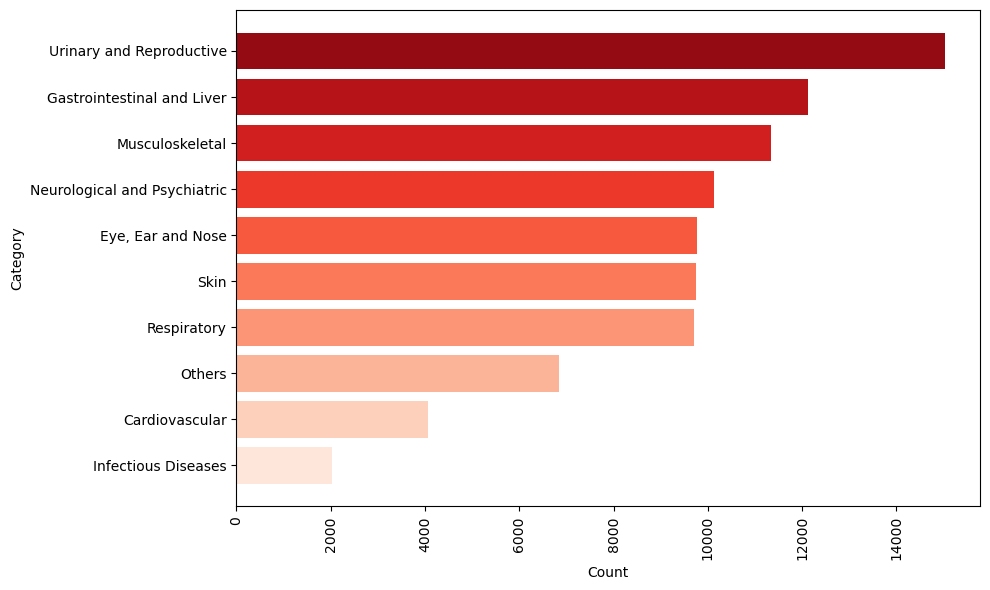

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['Category'].value_counts()

counts_sorted = counts.sort_values(ascending=True)

colors = sns.color_palette("Reds", n_colors=len(counts_sorted))

plt.figure(figsize=(10, 6))
plt.barh(counts_sorted.index, counts_sorted.values, color=colors)

plt.xlabel('Count')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

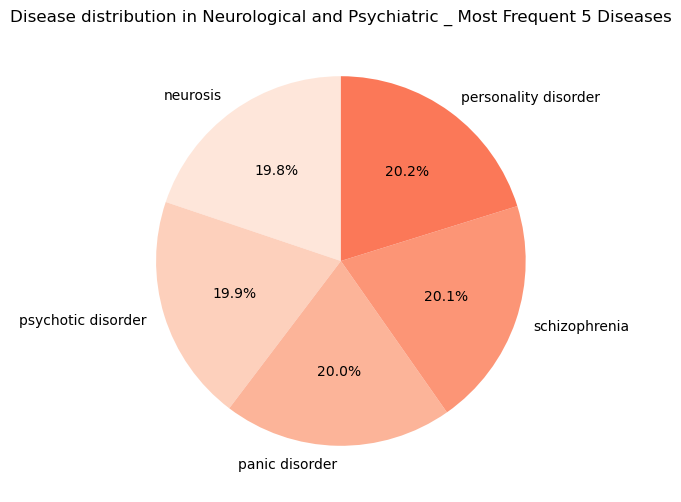

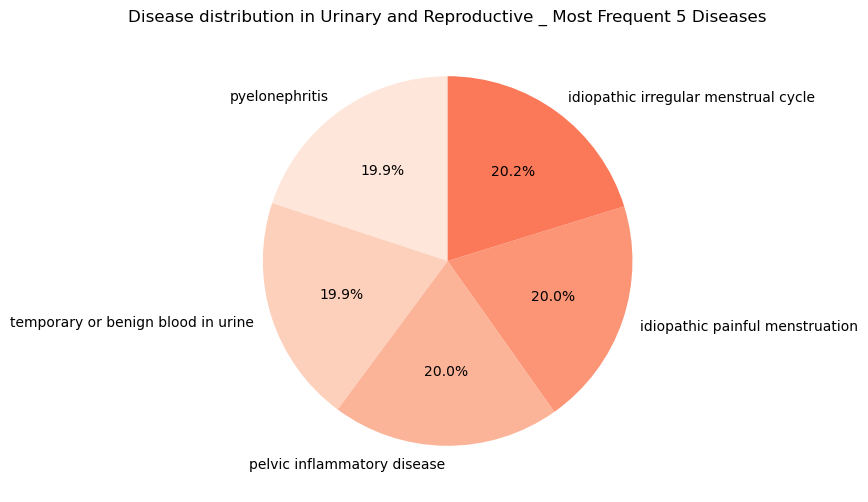

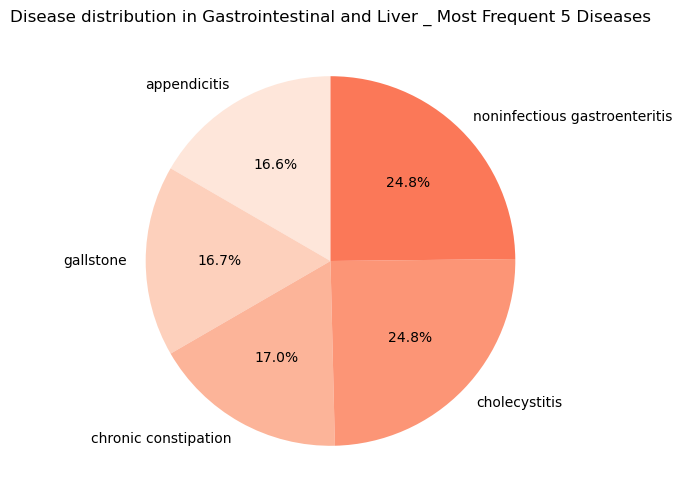

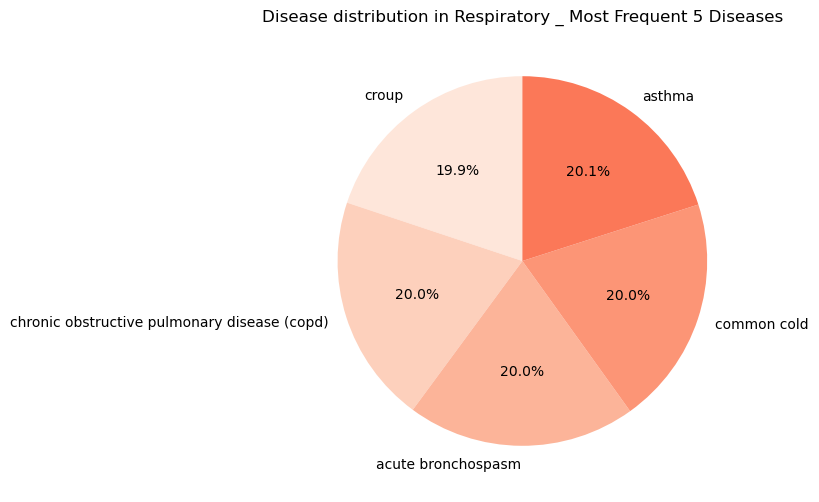

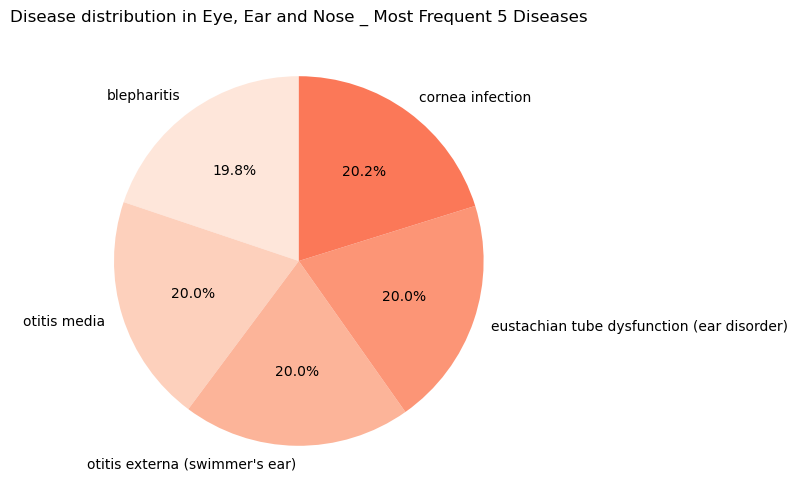

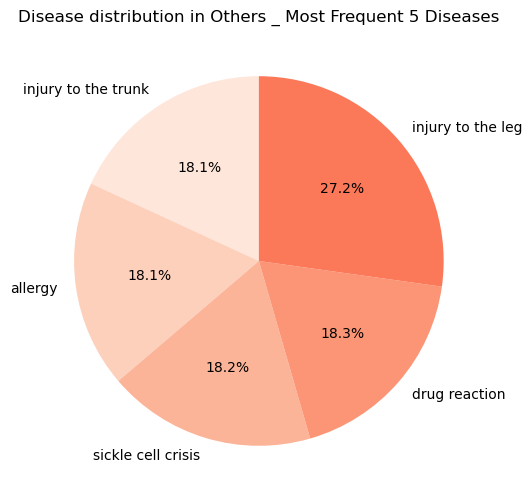

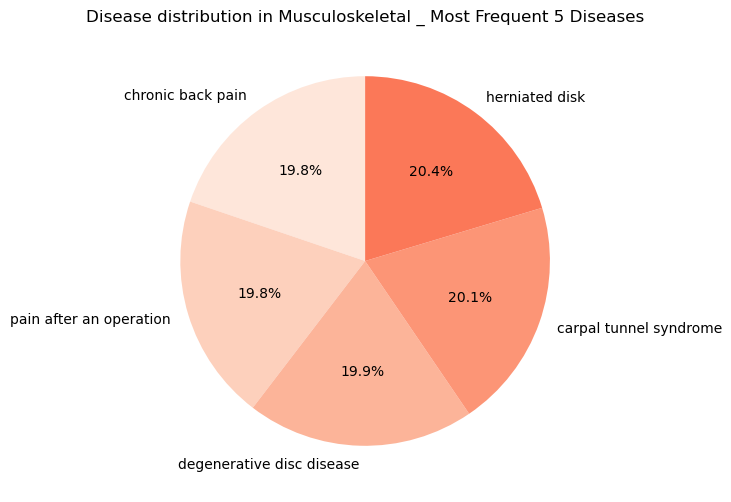

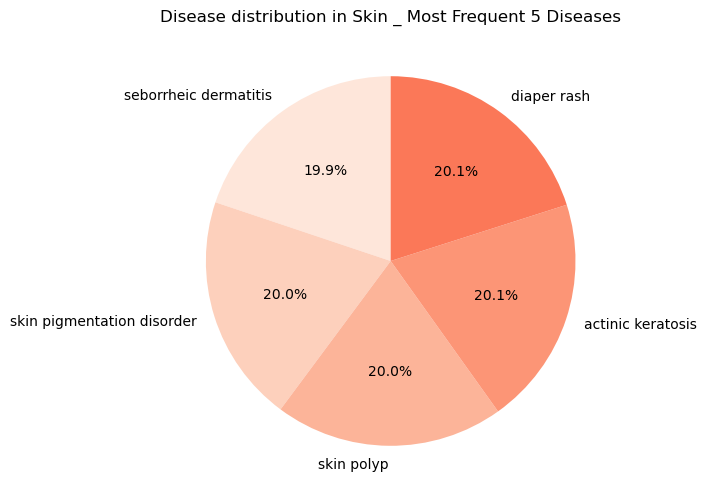

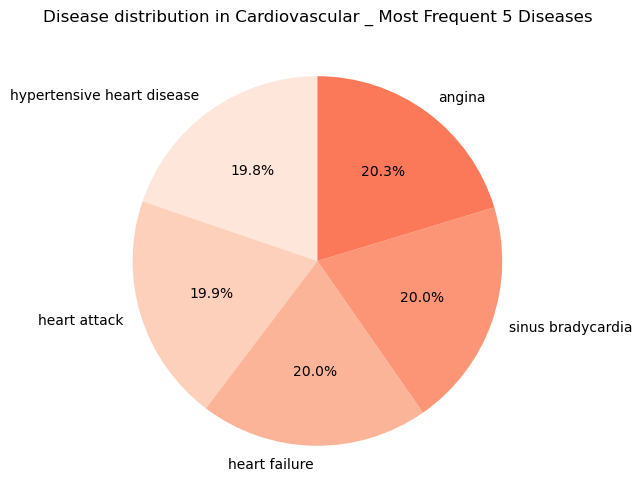

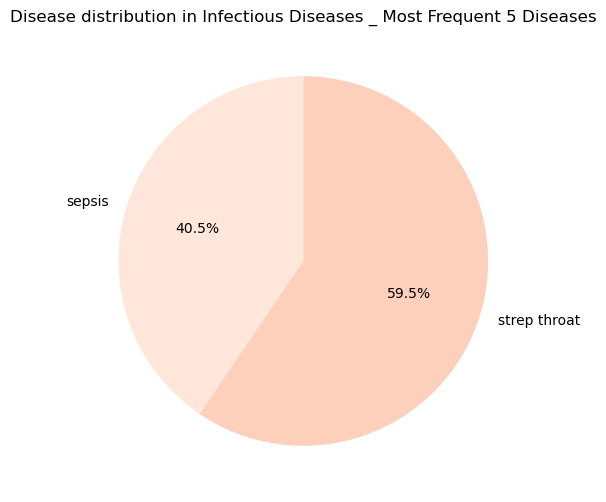

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Reds", n_colors=10)

for cat in df['Category'].unique():
    sub_df = df[df['Category'] == cat]
    
    counts = sub_df['diseases'].value_counts().sort_values(ascending=True)
    
    plt.figure(figsize=(6,6))
    plt.pie(
        counts.head(5).values,
        labels=counts.head(5).index,
        colors=colors[:len(counts)],   
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"Disease distribution in {cat} _ Most Frequent 5 Diseases")
    plt.show()


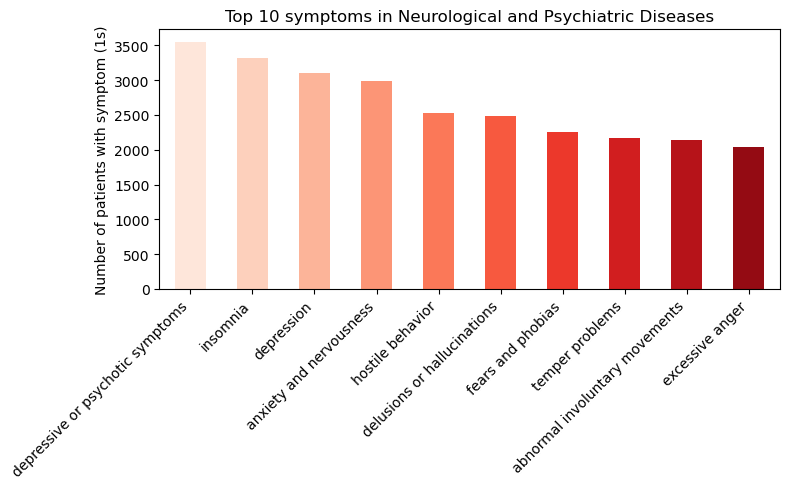

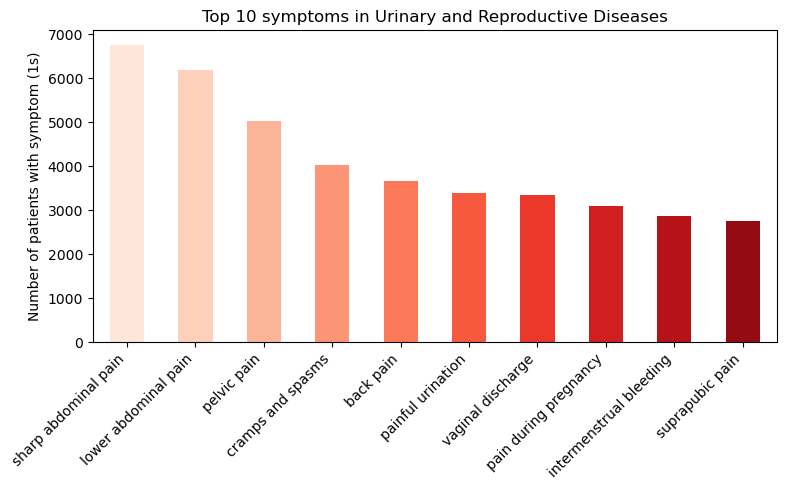

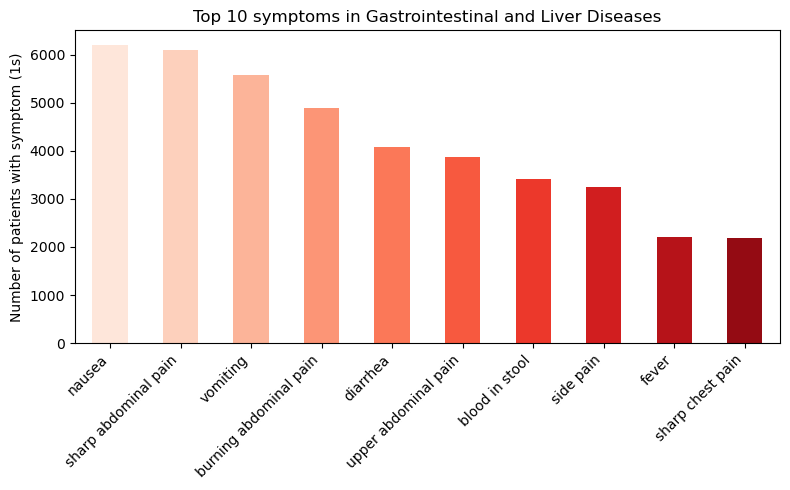

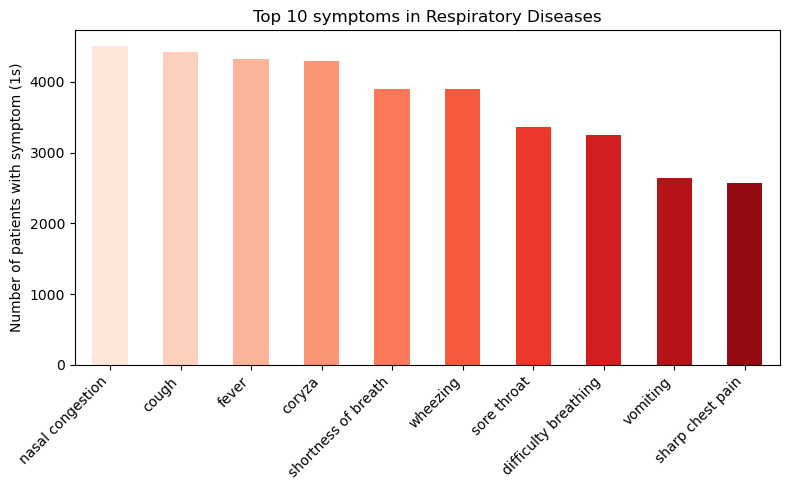

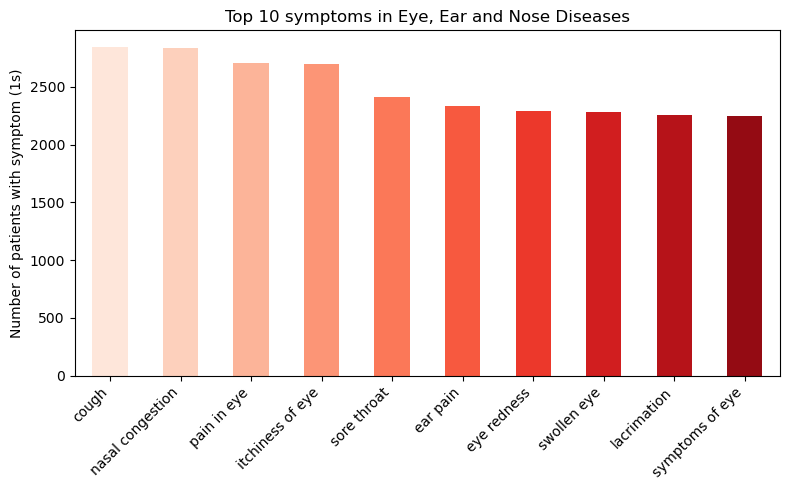

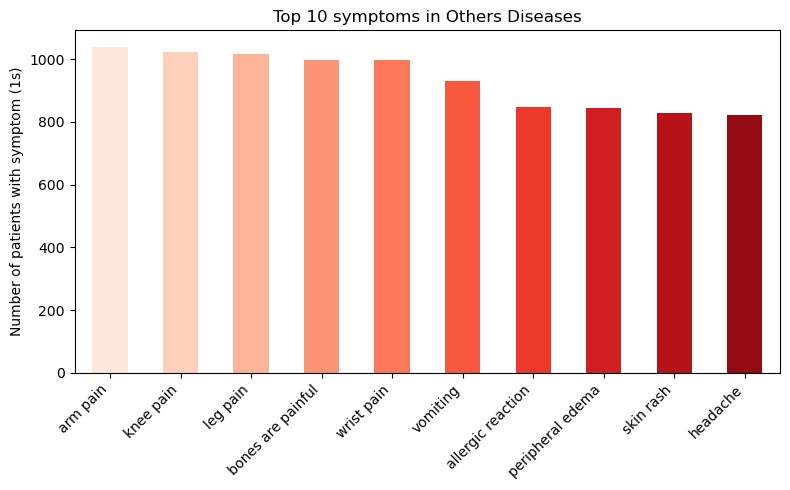

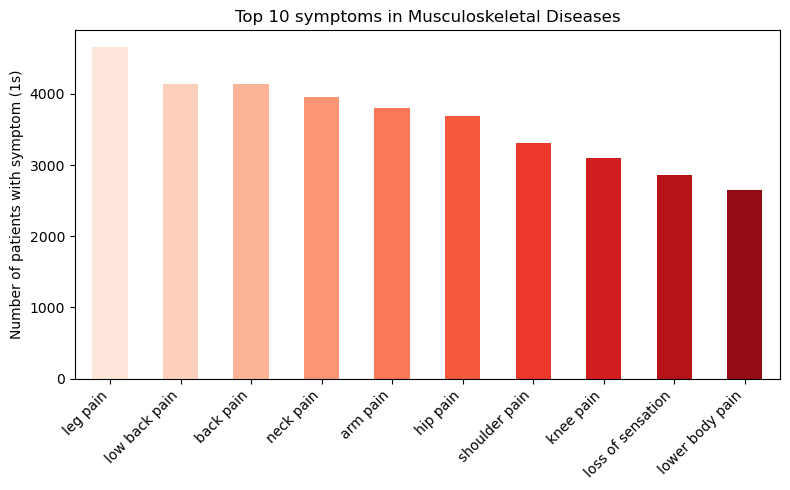

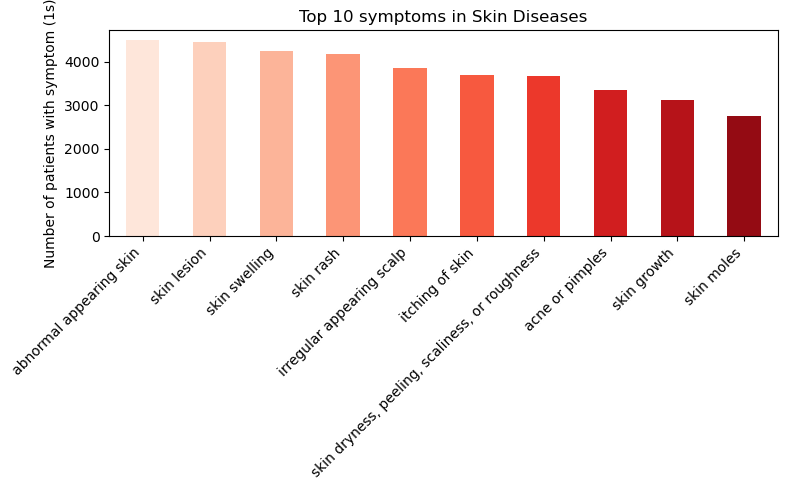

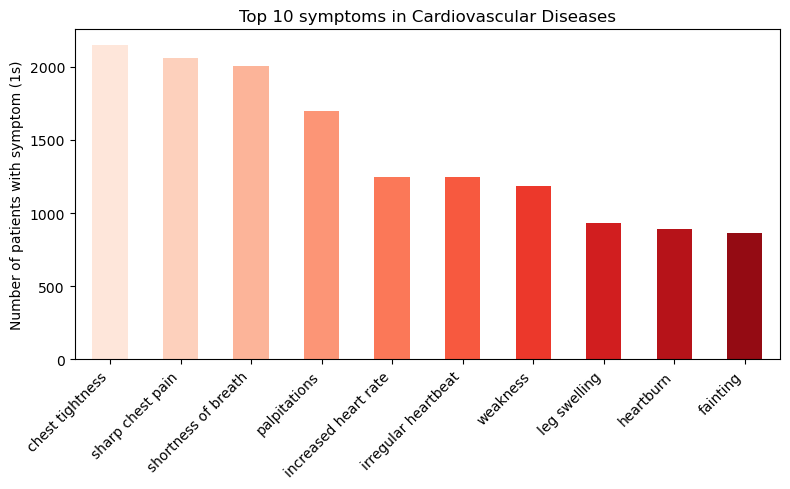

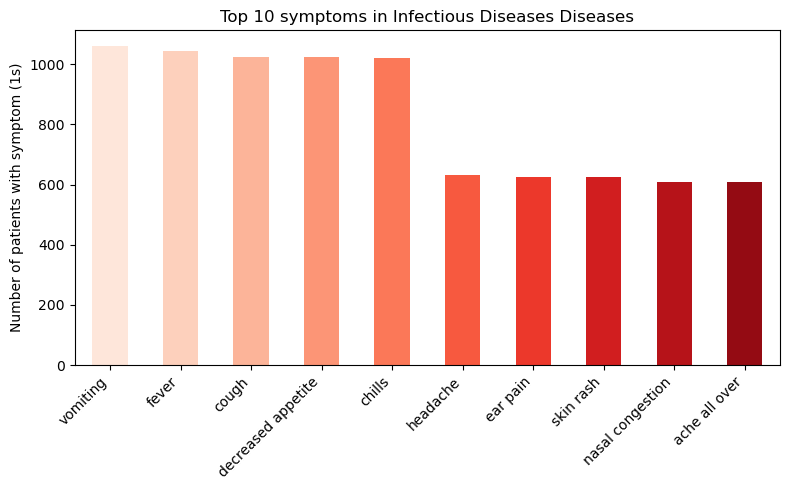

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 10
colors = sns.color_palette("Reds", n_colors=10)

for cat in df['Category'].unique():
    sub_df = df[df['Category'] == cat]
    symptom_cols = sub_df.drop(columns=['diseases','Category','num_symptoms','disease_encoded'])
    
    symptom_counts = symptom_cols.sum().sort_values(ascending=False)
    top_symptoms = symptom_counts.head(top_n)
    
    plt.figure(figsize=(8,5))
    top_symptoms.plot(kind='bar', color=colors[:top_n])
    plt.title(f"Top {top_n} symptoms in {cat} Diseases")
    plt.ylabel("Number of patients with symptom (1s)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Boxplot and Histogram of Number of Symptoms per Disease

In [222]:
Neuro

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,temper problems,sleepiness,fears and phobias,low self-esteem,obsessions and compulsions,antisocial behavior,leg weakness,hysterical behavior,num_symptoms,disease_encoded
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,66
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,5,66
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,9,66
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,6,66
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,5,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228138,developmental disability,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,5,31
228140,developmental disability,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,6,31
228141,developmental disability,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,8,31
228142,developmental disability,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,3,31


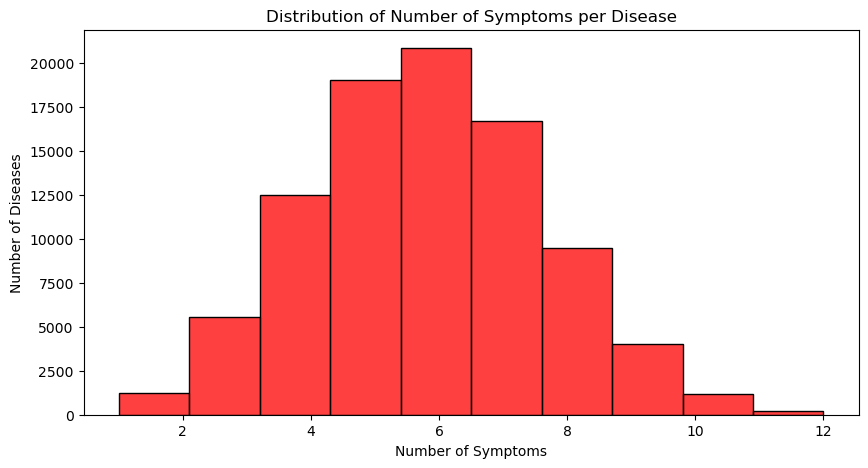

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['num_symptoms'], bins=10, kde=False, color='red')
plt.title('Distribution of Number of Symptoms per Disease')
plt.xlabel('Number of Symptoms')
plt.ylabel('Number of Diseases')
plt.show()


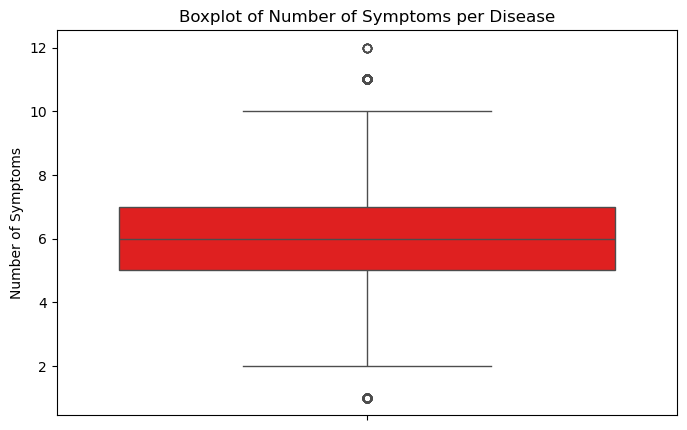

In [233]:

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y=df['num_symptoms'], color='red')
plt.title('Boxplot of Number of Symptoms per Disease')
plt.ylabel('Number of Symptoms')
plt.show()
